# Santander Value Prediction Challenge

#### Eden Trainor

## EDA and Novelty and Outlier Detection

**Outlier Detection:** The training data contains outliers which are defined as observations that are far from the others. Outlier detection estimators thus try to fit the regions where the training data is the most concentrated, ignoring the deviant observations.

**Novelty Detection:** The training data is not polluted by outliers and we are interested in detecting whether a new observation is an outlier. In this context an outlier is also called a novelty.

Data is Multivariant

In [97]:
# %load_ext pycodestyle_magic

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from numpy import array_equal
import matplotlib.pyplot as plt
import dlxtools as dlxt


# Set test colurs to white for dark theme notebook
params = {
    "ytick.color" : "w",
    "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
         }

plt.rcParams.update(params)

In [32]:
%%pycodestyle
USER_NAME = 'WilliamHoltam'  # Configure this with your username

DATA_REPO = ('C:/Users/' +
             USER_NAME +
             '/Datalytyx/Delivery - Documents/Data Science/Data/')

In [34]:
TRAIN_FOLDER = 'Santander_Value_Prediction/train.csv'
TEST_FOLDER = 'Santander_Value_Prediction/test.csv'

df_train = pd.read_csv(DATA_REPO + TRAIN_FOLDER)
df_test = pd.read_csv(DATA_REPO + TEST_FOLDER)

In [35]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB
None


In [36]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49342 entries, 0 to 49341
Columns: 4992 entries, ID to 9fc776466
dtypes: float64(4991), object(1)
memory usage: 1.8+ GB
None


In [66]:
class DFInfo:

    def __init__(self, train, test):
        self.train = train
        self.test = test
        return

    def info(self):
        # Nº of rows and colums
        print(
            'Train: Rows - ' +
            str(len(self.train)) +
            ' Columns - ' +
            str(len(self.train.columns))
        )

        print(
            'Test: Rows - ' +
            str(len(self.test)) +
            ' Columns - ' +
            str(len(self.test.columns))
        )

        # Type of columns
        train_col_types = self.train.dtypes
        test_col_types = self.train.dtypes
        print('-'*60)
        print('Train: Type of columns')
        print('-'*60)
        print(train_col_types.groupby(train_col_types).count())
        print('-'*60)
        print('Test: Type of columns')
        print('-'*60)
        print(test_col_types.groupby(test_col_types).count())

        # Missing values?
        print('-'*60)
        list = []
        counts = []
        
        for i in self.train.columns:
            list.append(i)
            counts.append(sum(self.train[i].isnull()))
            
        print('Train: Nº of columns with missing values')
        print('-'*60)
        print(sum(counts))
        print('-'*60)
        list = []
        counts = []
        
        for i in self.test.columns:
            list.append(i)
            counts.append(sum(self.test[i].isnull()))
            
        print('Test: Nº of columns with missing values')
        print('-'*60)
        print(sum(counts))

        # Zero Rows
        print('-'*60)

        columns_train_sum = (
            pd.DataFrame(
                self.train.sum(),
                columns=['Sum of Row']
            )
        )

        print('Train: Nº of columns with all rows zero: ')
        print('-'*60)
        print(str(columns_train_sum[columns_train_sum == 0].count()))
        print('-'*60)

        columns_test_sum = (
            pd.DataFrame(
                self.test.sum(),
                columns=['Sum of Row']
            )
        )

        print('Test: Nº of columns with all rows zero: ')
        print('-'*60)
        print(str(columns_test_sum[columns_train_sum == 0].count()))
        print('-'*60)
        
x = DFInfo(train = df_train, test = df_test).info()
x

Train: Rows - 4459 Columns - 4993
Test: Rows - 49342 Columns - 4992
------------------------------------------------------------
Train: Type of columns
------------------------------------------------------------
int64      3147
float64    1845
object        1
dtype: int64
------------------------------------------------------------
Test: Type of columns
------------------------------------------------------------
int64      3147
float64    1845
object        1
dtype: int64
------------------------------------------------------------
Train: Nº of columns with missing values
------------------------------------------------------------
0
------------------------------------------------------------
Test: Nº of columns with missing values
------------------------------------------------------------
0
------------------------------------------------------------
Train: Nº of columns with all rows zero: 
------------------------------------------------------------
Sum of Row    256
dtype: int

In [59]:
# Is any ID on the test dataset?
for i in df_train.ID.values:
    c = 0
    if i in df_test.ID.values:
        c = c + 1
        
print('Nº of ID''s on the test dataset: ' + str(c))

In [ ]:
# Check if there is any visible outlier on the target?

plt.plot(df_train.ID, df_train.sort_values(by=['target']).target)
plt.xlabel('ID')
plt.ylabel('Target')
plt.title('ID vs Target')
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(df_train["target"],kde=True)
plt.show()

C:\Users\WilliamHoltam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


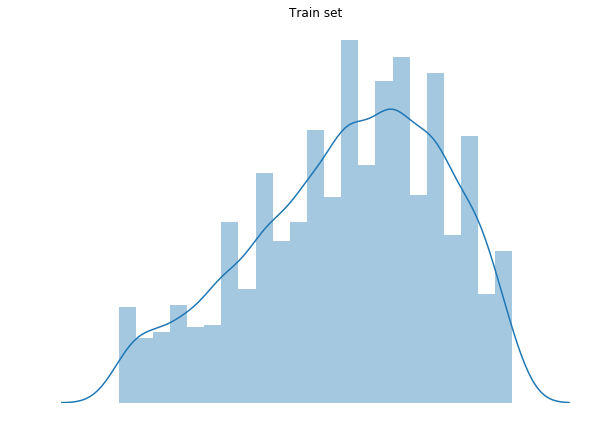

In [154]:
df_train['target_log'] = np.log(df_train.target)
plt.figure(figsize=(10,7))
sns.distplot(df_train['target_log'],kde=True)
plt.title("Train set")
plt.show()

C:\Users\WilliamHoltam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


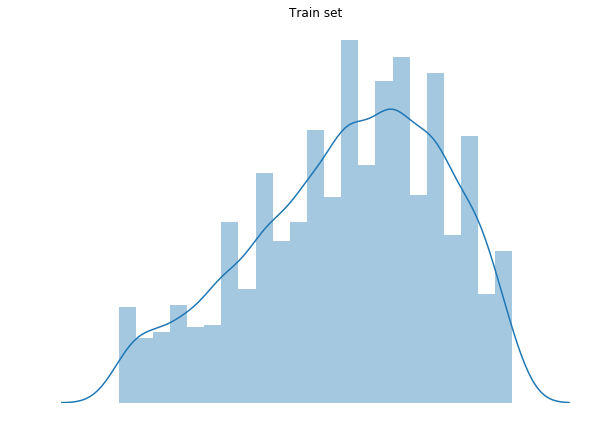

In [70]:
df_train['target_log'] = np.log(df_train.target)
plt.figure(figsize=(10,7))
sns.distplot(df_train['target_log'],kde=True)
plt.title("Train set")
plt.show()

In [86]:
class RemoveCorrelatedFeatures(BaseEstimator, TransformerMixin):

    """
    A class that drops features if the pairwise correlation between features
    is greater than the specified corr_threshold. If no corr_threshold is
    specified then the corr_threshold is 0.9.

    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'}
            * pearson : standard correlation coefficient
            * kendall : Kendall Tau correlation coefficient
            * spearman : Spearman rank correlation

    test : the test dataset in pandas DataFrame form.

    Authors
    -------
    William Holtam
    """

    def __init__(
        self,
        method='pearson',
        corr_threshold=0.99,
        print_drop_feat=False
    ):

        """
        Description
        -----------
        Initialise the transformer object and sets the method,
        corr_threshold and print_drop_featas instance variables.
        """

        self.method = method
        self.corr_threshold = corr_threshold
        self.print_drop_feat = print_drop_feat

    def fit(self, X, y=None):

        """
        Fit creates a correlation matrix and itterates through it to
        identify columns which are correlated to a greater extent than
        the corr_threshold.

        The column numbers of these columns are appended to the
        "drop_cols" list. The "drop_cols" list is sorted and assigned
        to the instance variable self.drops.
        """

        # Creates Correlation Matrix
        corr_matrix = X.corr()
        iters = range(len(corr_matrix.columns) - 1)
        drop_cols = []
        count = 0

        # Iterates through Correlation Matrix Table to find correlated columns
        for i in iters:
            for j in range(i):
                item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
                col = item.columns
                row = item.index
                val = item.values

                if abs(val) >= self.corr_threshold:

                    # Prints the correlated feature set and the corr val
                    if self.print_drop_feat is True:

                        print(
                            col.values[0],
                            "|",
                            row.values[0],
                            "|",
                            round(val[0][0], 2)
                        )

                    drop_cols.append(i)
                    count += 1

        print(str(count)+" features have been droped.")
        self.drops = sorted(set(drop_cols))[::-1]

        return self

    def transform(self, X):

        """
        Transform indexes the inputed dataframe X for the dropped columns and
        drops them from the dataframe.
        """

        # Drops the correlated columns
        for i in self.drops:
            col = X.iloc[:, (i+1):(i+2)].columns.values
            X = X.drop(col, axis=1)

        return X


x = RemoveCorrelatedFeatures().fit_transform(df_train.iloc[0:100, 0:100])

C:\Users\WilliamHoltam\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in greater_equal


21 features have been droped.


In [95]:
class DuplicateColumnRemover(BaseEstimator, TransformerMixin):

    """
    Class
    """

    def fit(self, X, y=None):
        groups = X.columns.to_series().groupby(X.dtypes).groups
        dups = []

        for int64, float64 in groups.items():

            columns = X[float64].columns
            vs = X[float64]
            columns_length = len(columns)

            for i in range(columns_length):
                ia = vs.iloc[:, i].values
                for j in range(i+1, columns_length):
                    ja = vs.iloc[:, j].values
                    if array_equal(ia, ja):
                        dups.append(columns[i])
                        break

        self.dups = dups
        return self

    def transform(self, X):
        X = X.drop(self.dups, axis=1)
        return X


x = DuplicateColumnRemover().fit_transform(df_train.iloc[0:100, 0:100])

With the log of the target the distribuiton looks more distribuite, more like a normal distribuition

Here is an example of what a correlation plot looks like for only the first few columns. In this plot stronger correlations have brighter colours from blue (negative correlation) to red (positive correlation). The closer a plot element is to grey the closer the (spearman) correlation coefficient is to zero:

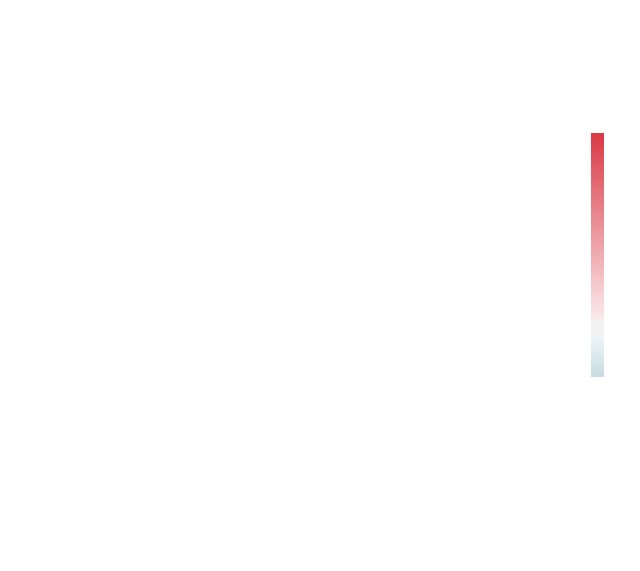

In [156]:
df_train_short = df_train.drop(columns=["target"])
df_train_short = df_train_short.iloc[:,:]
corr = df_train_short.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [140]:
# corr_train_target.sort_values(0).plot()
# plt.xlabel("Features")
# plt.ylabel("Spearman's Rank")
# plt.title("Features vs Spearman's Rank", color="w")
# plt.show()

In [142]:
# ## Drop columns will all zero values
# list_columns_train_drop=[]
# for i in columns_train_sum[columns_train_sum['Sum of Row']==0].index:
#     list_columns_train_drop.append(i)
# df_train = df_train.drop(columns=list_columns_train_drop)
# len(df_train.columns)

In [143]:
## Verify the correlation between the target and the variables
corr_train_target_values = []
corr_train_target_column = []
for i in df_train.columns:
    if i in ['ID','target','target_log']:
        None
    else:
        corr = df_train[['target',i]].corr(method='spearman')
        corr_train_target_values.append(corr.target[1])
        corr_train_target_column.append(i)

corr_train_target = pd.DataFrame(corr_train_target_values,index=corr_train_target_column)
corr_train_target.describe()

,0
count,4735.000000
mean,-0.012092
std,0.030831
min,-0.116095
25%,-0.027745
50%,-0.008558
75%,0.008232
max,0.107678


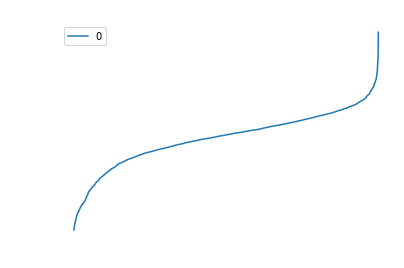

In [144]:
corr_train_target.sort_values(0).plot()
plt.xlabel("Features")
plt.ylabel("Spearman's Rank")
plt.title("Features vs Spearman's Rank", color="w")
plt.show()

In [163]:
## Verify the correlation between the target and the variables
corr_train_target_values = []
corr_train_target_column = []
for i in df_train.columns:
    if i in ['ID','target','target_log']:
        None
    else:
        corr = df_train[['target',i]].corr(method='pearson')
        corr_train_target_values.append(corr.target[1])
        corr_train_target_column.append(i)

corr_train_target = pd.DataFrame(corr_train_target_values,index=corr_train_target_column)
corr_train_target.describe()

,0
count,4735.000000
mean,0.023465
std,0.053689
min,-0.051813
25%,-0.007194
50%,0.006248
75%,0.028457
max,0.273379


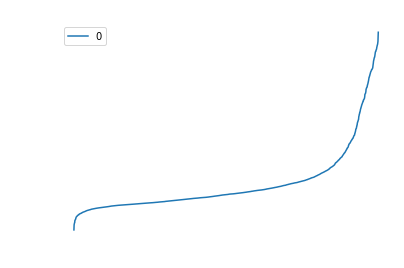

In [164]:
corr_train_target.sort_values(0).plot()
plt.xlabel("Feature")
plt.ylabel("PCC")
plt.title("Feature vs PCC", color="w")
plt.show()

There is a low correlation of the variables with the target. Let's see how's the distribuiton off eah variable

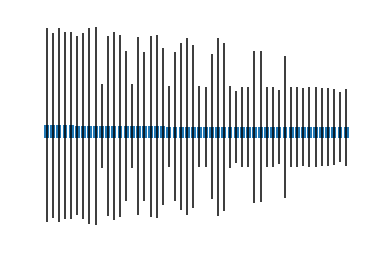

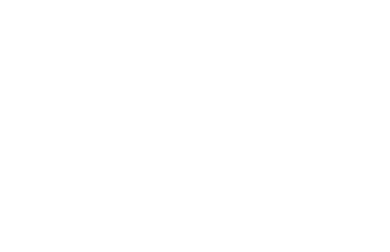

In [10]:
df_train['target_log'] = np.log(df_train.target)
X = df_train.drop(columns=['target','target_log','ID'])
variable_mean = X.mean()
variable_std = X.std()
variable_name = X.columns
high_indices = np.argsort(variable_mean)[::-1][:50]
low_indices = np.argsort(variable_mean)[:50]
plt.bar(range(len(variable_mean[high_indices])),variable_mean[high_indices],yerr=variable_std[high_indices])
#plt.xticks(range(len(variable_mean[high_indices])),variable_name[high_indices],rotation='vertical')
plt.show()
plt.bar(range(len(variable_mean[low_indices])),variable_mean[low_indices],yerr=variable_std[low_indices])
#plt.xticks(range(len(variable_mean[low_indices])),variable_name[low_indices],rotation='vertical')
plt.show()

C:\Users\WilliamHoltam\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys


100
0.2993710474348697
200
0.41791994873217836
300
0.5095929647326376
400
0.5858403822213976
500
0.6459103447067306
600
0.7003343556863603
700
0.7465079073281333
800
0.7859043687194954
900
0.8196230656424027


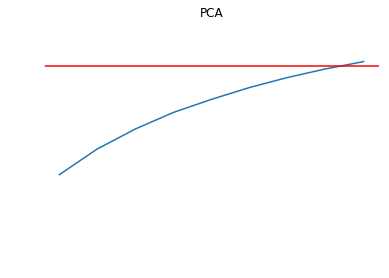

In [148]:
# Implementing a PCA to reduze the amount of variables and standardize data

from sklearn import preprocessing
from sklearn.decomposition import PCA

X = df_train.drop(columns=['target','ID','target_log'])
X = preprocessing.scale(X)
list_n_comp=[]
list_var_ratio=[]
n_comp = 100
max_list_var_ratio = 0.0
while max_list_var_ratio<0.8: #n_comp <= 1000:
    print(n_comp)
    pca = PCA(n_components=n_comp)
    pca.fit(X)
    list_n_comp.append(n_comp)
    list_var_ratio.append(sum(pca.explained_variance_ratio_))
    max_list_var_ratio = max(list_var_ratio)
    print(max_list_var_ratio)
    n_comp = n_comp + 100
#list_n_comp,list_var_ratio

plt.plot(list_n_comp, list_var_ratio)
plt.xlabel('Number of components')
plt.ylabel('Variance Ratio')
plt.title('PCA')
plt.ylim([0,1])
plt.axhline(0.8,color='r')
plt.show()

In [13]:
# PCA with 80% explained ratio is with 900 components
from sklearn import preprocessing
from sklearn.decomposition import PCA

X = df_train.drop(columns=['target','ID','target_log'])
X = pd.DataFrame(preprocessing.scale(X),columns = X.columns)
pca = PCA(n_components=900)
X_pca = pd.DataFrame(pca.fit_transform(X))

df_train_pca = df_train.loc[:,['ID','target','target_log']]
df_train_pca[X_pca.columns.values]= X_pca

X = df_test.drop(columns=['ID'])
X = pd.DataFrame(preprocessing.scale(X),columns = X.columns)
pca = PCA(n_components=900)
X_pca = pd.DataFrame(pca.fit_transform(X))

df_test_pca = pd.DataFrame(df_test['ID'],columns=['ID'])
df_test_pca[X_pca.columns.values] = X_pca

C:\Users\WilliamHoltam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [14]:
df_test_pca.head()

,ID,0,1,2,3,4,5,6,7,8,...,890,891,892,893,894,895,896,897,898,899
0,000137c73,3.549097,-5.999430,6.760546,-3.861732,3.849445,-0.103234,0.525194,1.850171,1.964700,...,1.402093,4.560413,-5.920401,4.315662,3.803764,5.355811,9.457021,-3.841476,4.855990,0.899153
1,00021489f,-3.002049,0.450138,0.225339,0.063281,-0.425153,0.115196,0.232534,0.262705,0.325272,...,-0.078115,-0.199460,-0.097512,0.053813,-0.231464,-0.020244,-0.179826,0.023610,-0.114909,-0.265857
2,0004d7953,-0.817816,0.862562,0.423033,0.507887,2.344211,0.060266,0.059508,-0.260758,-0.469158,...,0.067713,-0.468586,-0.386119,0.297543,0.057460,-0.469009,-0.112279,-0.032494,-0.641728,-0.015851
3,00056a333,6.918031,3.314991,2.182499,-2.145515,4.519310,0.620639,-0.382959,0.618229,-0.382627,...,0.142281,0.920419,-0.629845,1.751943,-0.376071,-0.190376,-0.075540,-0.441666,0.374101,-0.703239
4,00056d8eb,-2.988230,0.128151,0.071049,-0.034925,-0.845434,-0.031931,-0.020809,-0.154001,0.140849,...,-1.704078,0.591648,-1.171941,0.647832,-0.292748,-0.618417,-0.139675,1.106293,0.434949,0.830297


In [15]:
df_test_pca[X_pca.columns.values].shape

(49342, 900)

There a big difference between each variable in terms off the mean and std. Best to standardize the data and reduce the number of variables for predictions

In [16]:
from sklearn import svm

In [20]:
##### from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pandas.tools.plotting import scatter_matrix

dim_reduction = PCA()
Xc = dim_reduction.fit_transform(scale(X))

print('variance explained by the first 2 components: %0.1f%%' % (
    sum(dim_reduction.explained_variance_ratio_[:2]*100)
))

print('variance explained by the last 2 components: %0.1f%%' % (
    sum(dim_reduction.explained_variance_ratio_[-2:]*100)
))

variance explained by the first 2 components: 1.0%
variance explained by the last 2 components: 0.0%


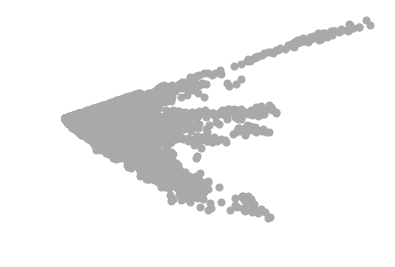

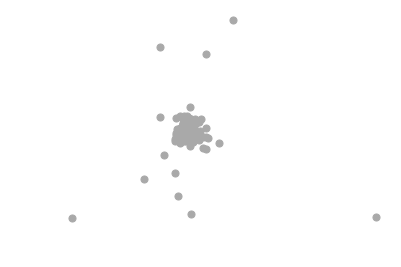

In [22]:
df = pd.DataFrame(Xc, columns=['comp_'+str(j+1) for j in range(4991)])
first_two = df.plot(kind='scatter', x='comp_1', y='comp_2', c='DarkGray', s=50)
last_two = df.plot(kind='scatter', x='comp_9', y='comp_10', c='DarkGray', s=50)

In [ ]:
x = plt.plot(Xc)
plt.show(x)

In [ ]:
outlying = (Xc[:,-1] < -40) | (Xc[:,-2] < -0.1)
# print(outlying)
# print(Xc[:,-1])

In [ ]:
from sklearn.cluster import DBSCAN
DB = DBSCAN(eps=2.5, min_samples=25)
DB.fit(Xc)
from collections import Counter
print(Counter(DB.labels_),'n')
print(df[DB.labels_==-1])
Counter({0: 414, -1: 28})